In [1]:
!pip install -q umap-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
import umap.umap_ as umap
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
images = data.images
X = data.data
y = data.target
target_names = data.target_names

In [4]:
print(X.shape)
print(len(np.unique(y)))

(1560, 1850)
12


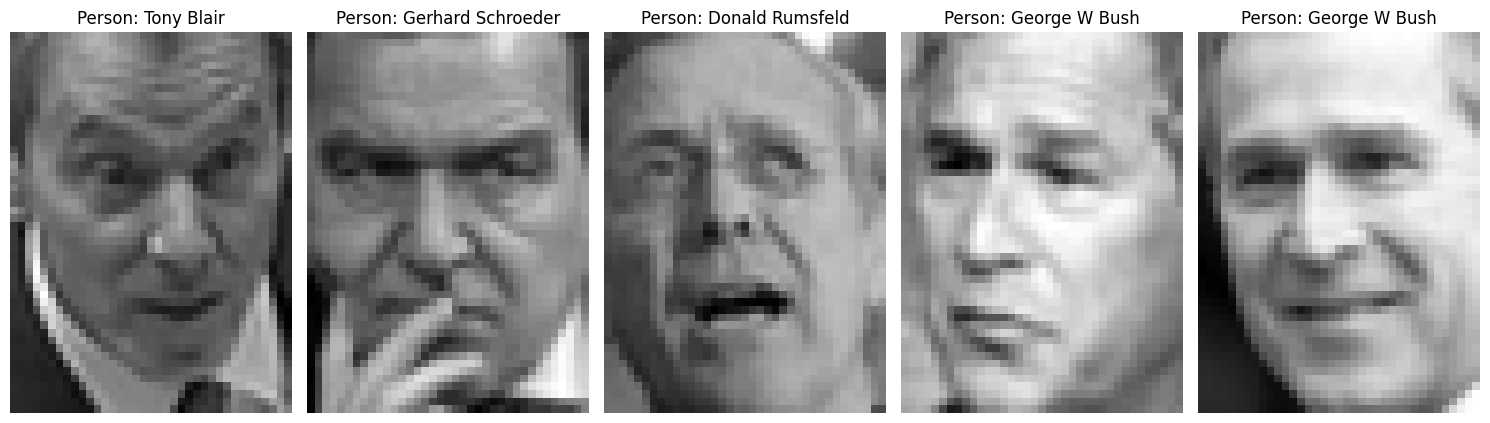

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Person: {target_names[y[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

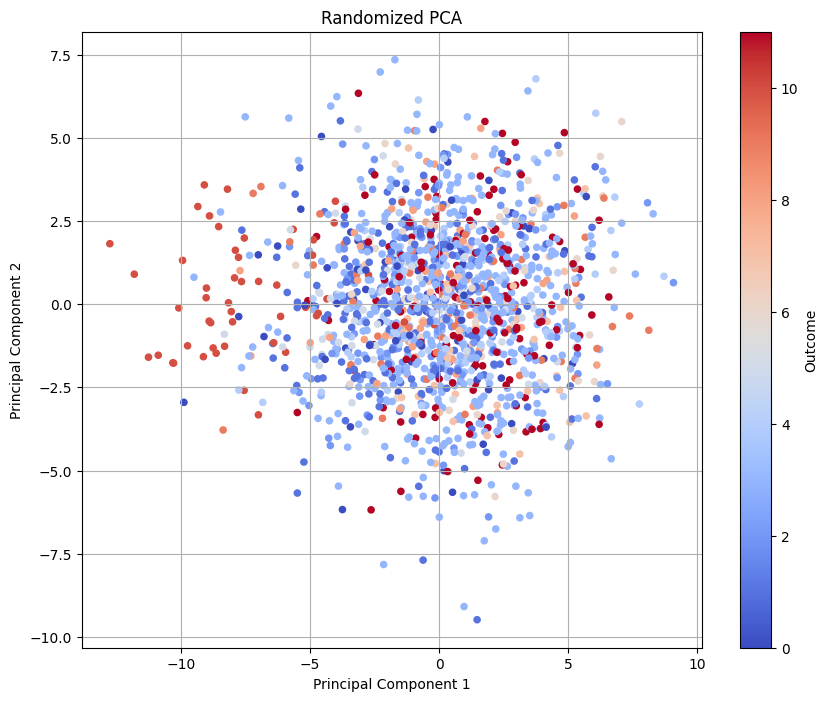

In [6]:
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_rpca = randomized_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_rpca[:, 0], X_rpca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Randomized PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

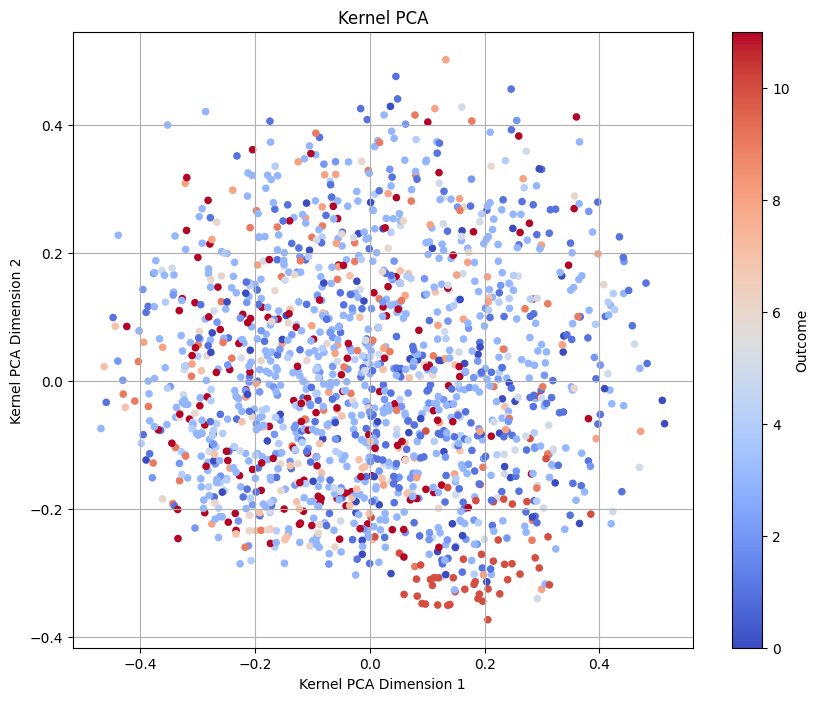

In [7]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, random_state=42)
X_kpca = kernel_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Kernel PCA")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.grid(True)
plt.show()

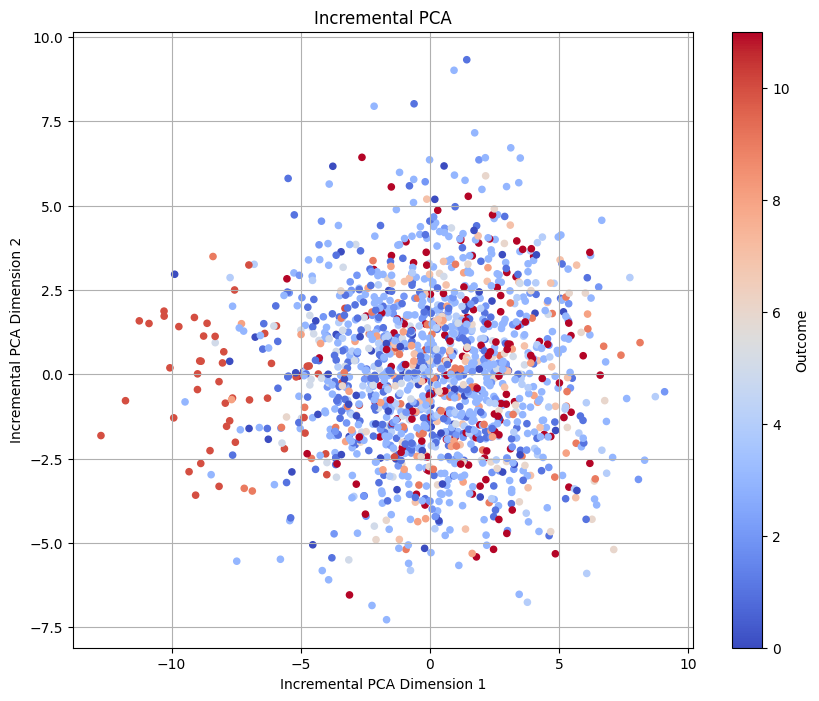

In [8]:
incremental_pca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = incremental_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Incremental PCA")
plt.xlabel("Incremental PCA Dimension 1")
plt.ylabel("Incremental PCA Dimension 2")
plt.grid(True)
plt.show()

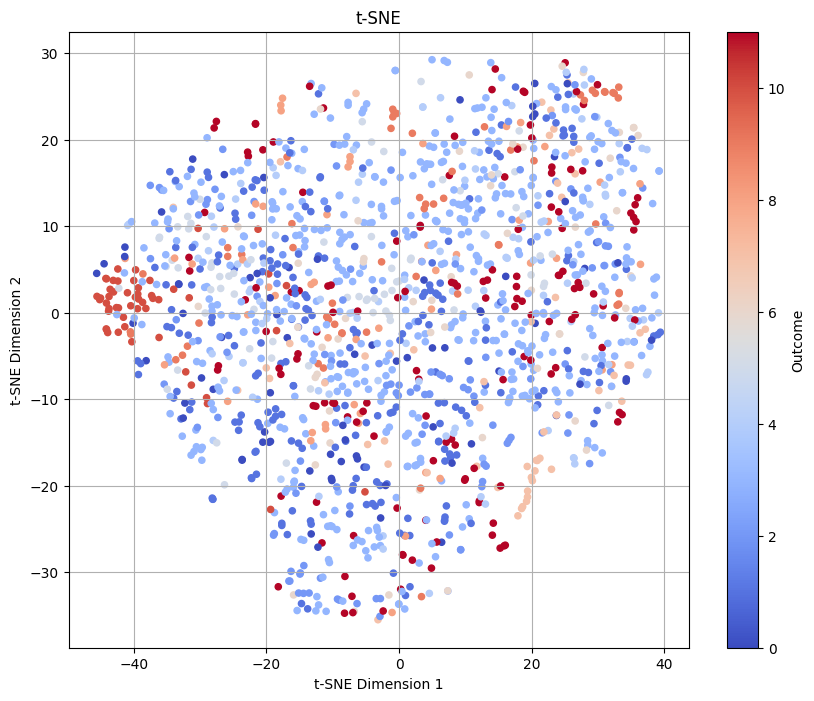

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

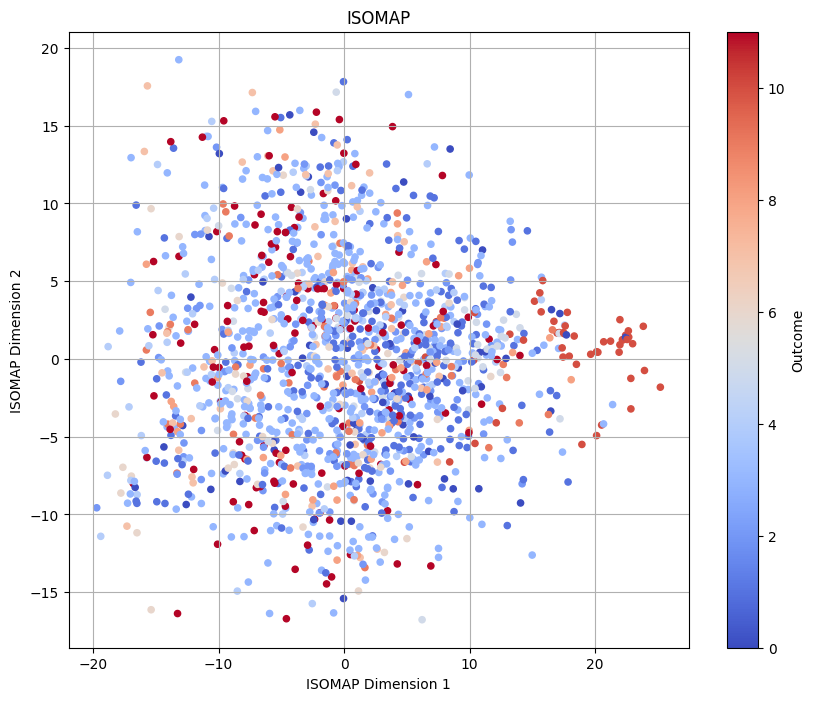

In [10]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("ISOMAP")
plt.xlabel("ISOMAP Dimension 1")
plt.ylabel("ISOMAP Dimension 2")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


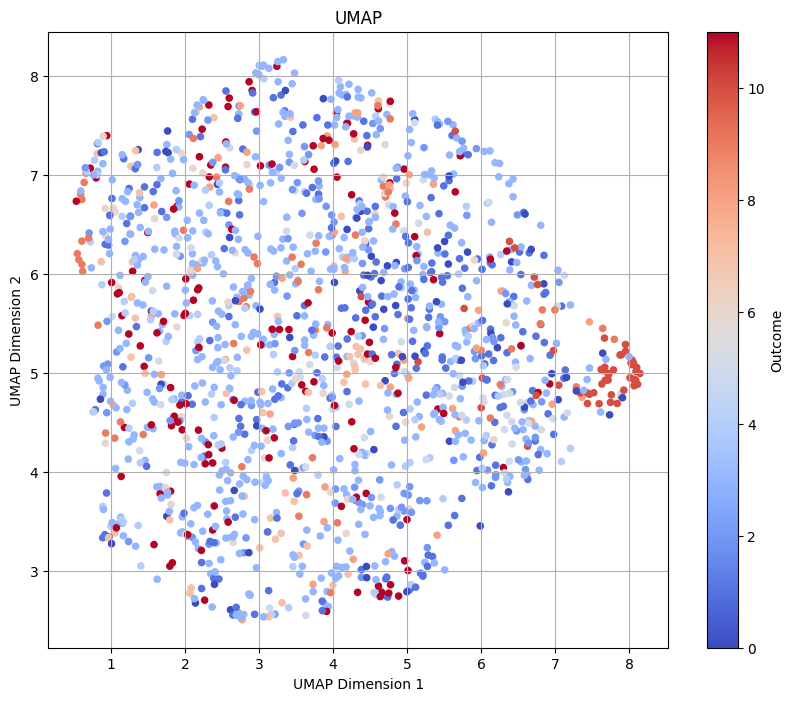

In [11]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("UMAP")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

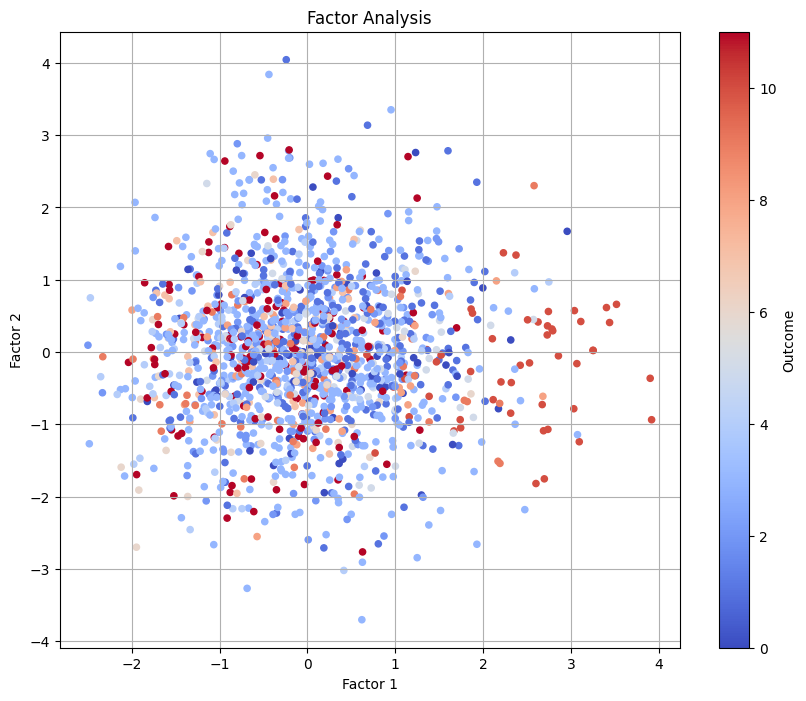

In [12]:
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Factor Analysis")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.grid(True)
plt.show()

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


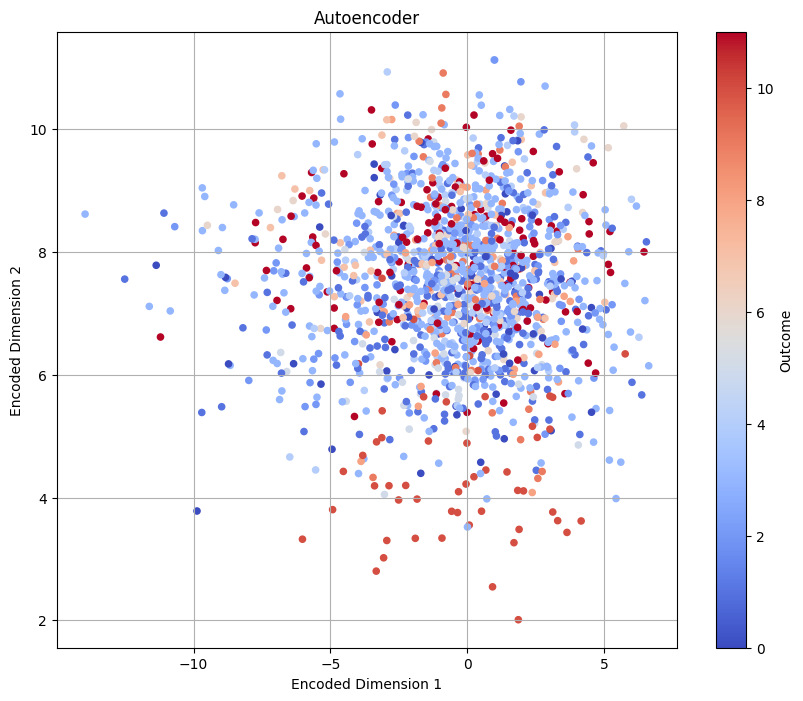

In [13]:
input_dimensions = X.shape[1]

input_layer = layers.Input(shape=(input_dimensions,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded_output = layers.Dense(2, activation='linear')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded_output)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded_output = layers.Dense(input_dimensions, activation='sigmoid')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded_output)
encoder = models.Model(inputs=input_layer, outputs=encoded_output)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, verbose=0)

X_autoencoder = encoder.predict(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_autoencoder[:, 0], X_autoencoder[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Autoencoder")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.grid(True)
plt.show()

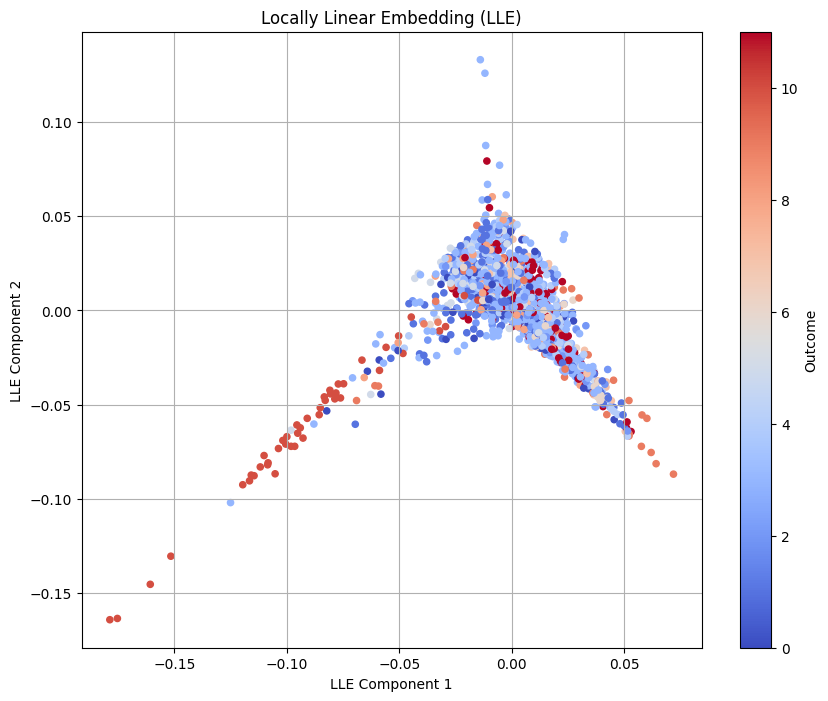

In [14]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard')
X_lle = lle.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Locally Linear Embedding (LLE)")
plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.grid(True)
plt.show()

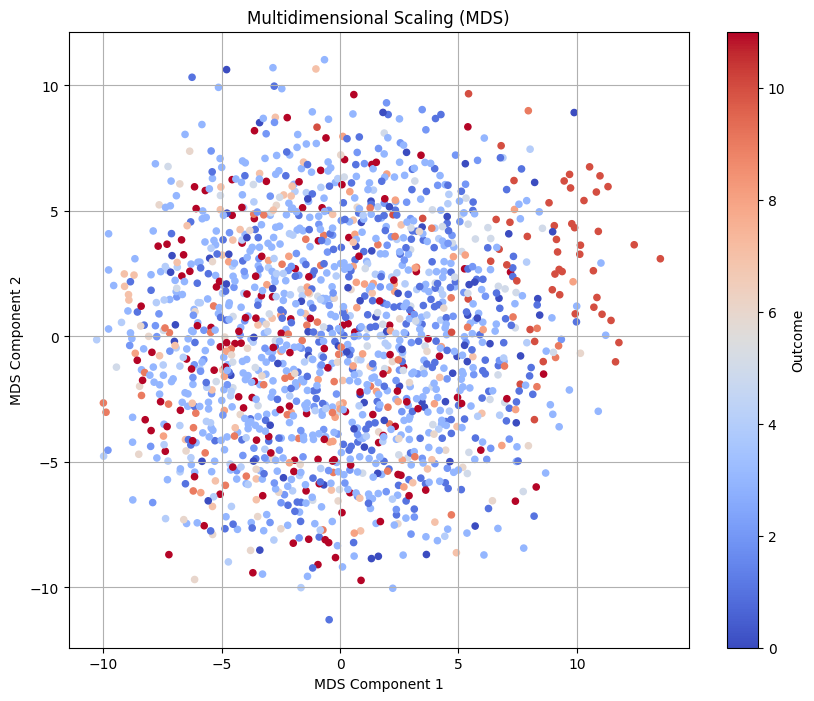

In [15]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Multidimensional Scaling (MDS)")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.grid(True)
plt.show()

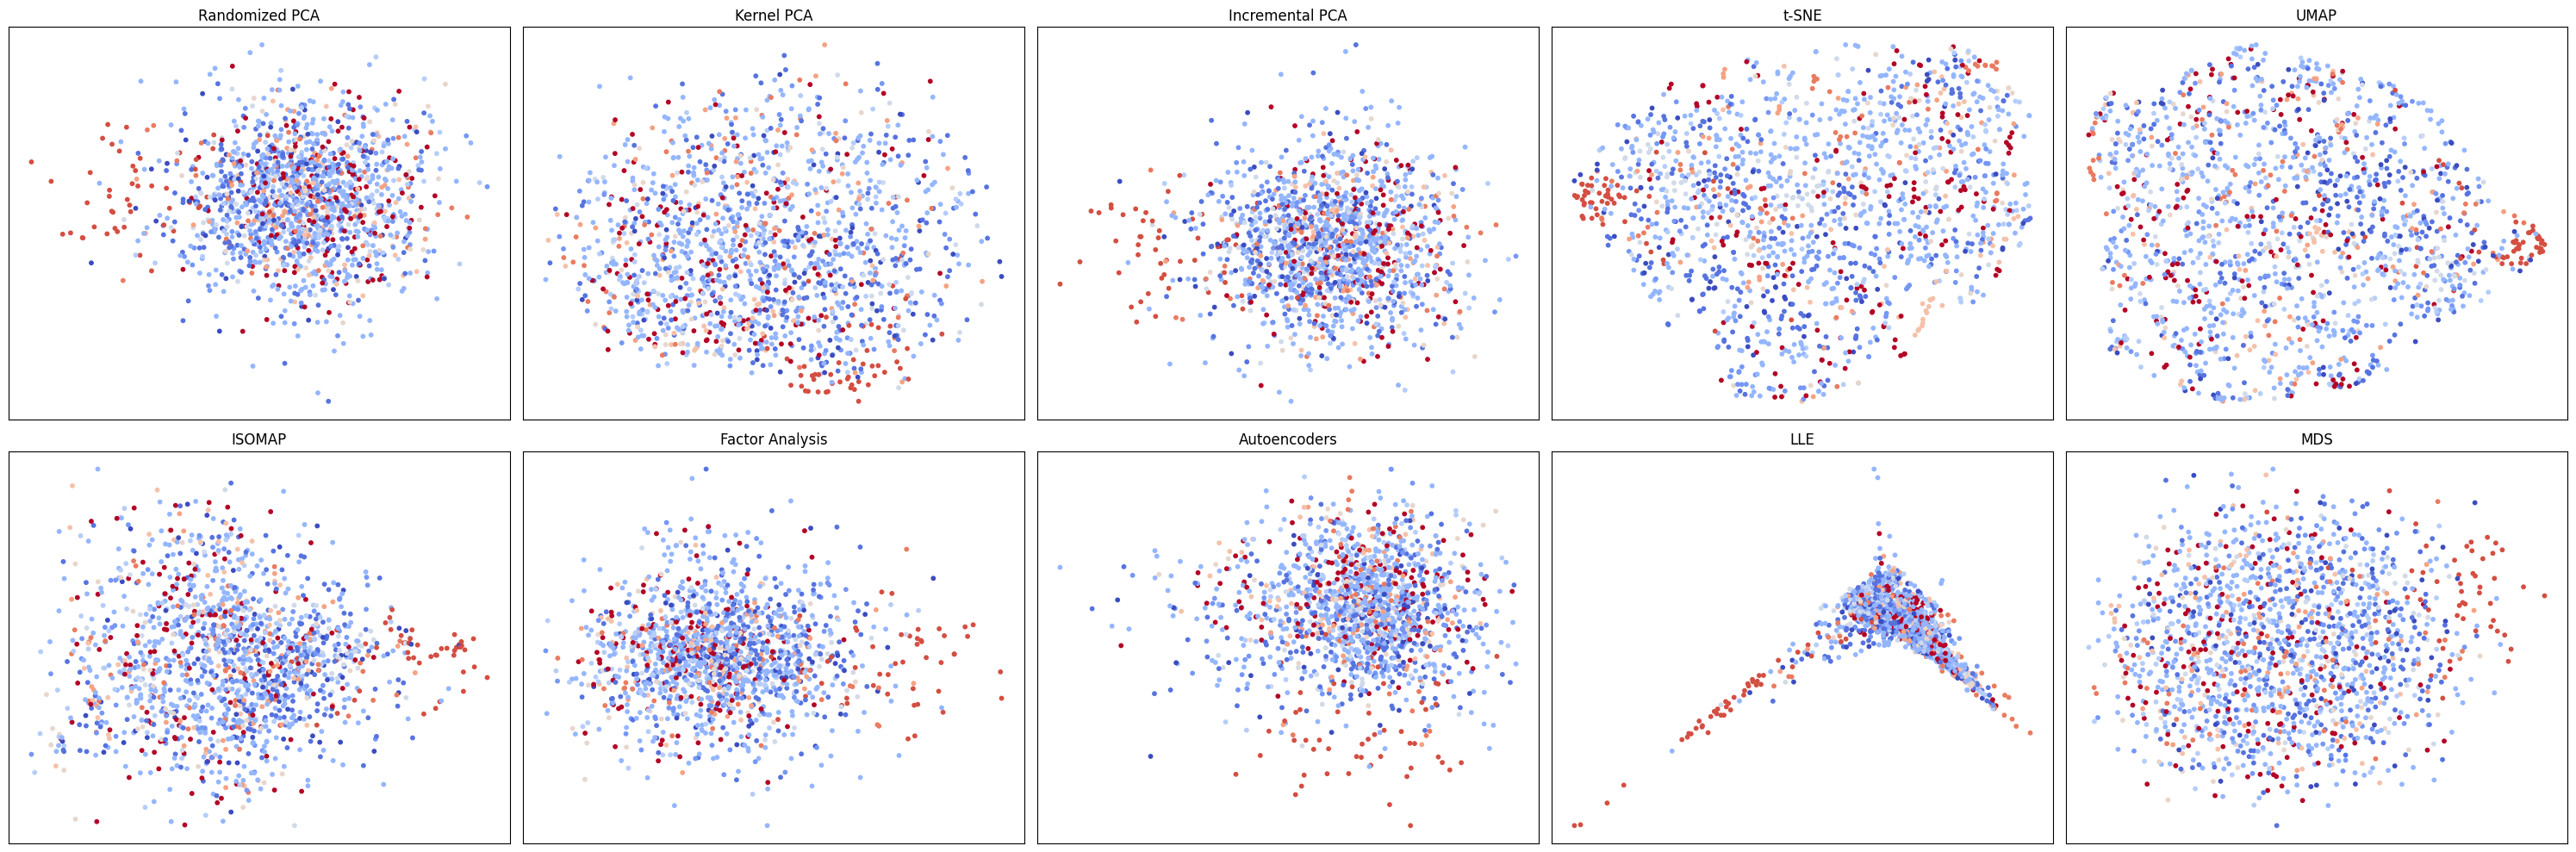

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(30, 10))
techniques = [
    ("Randomized PCA", X_rpca),
    ("Kernel PCA", X_kpca),
    ("Incremental PCA", X_ipca),
    ("t-SNE", X_tsne),
    ("UMAP", X_umap),
    ("ISOMAP", X_isomap),
    ("Factor Analysis", X_fa),
    ("Autoencoders", X_autoencoder),
    ("LLE", X_lle),
    ("MDS", X_mds)
]

for ax, (title, data) in zip(axes.flat, techniques):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='coolwarm', s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Summary

For image data, UMAP and t-SNE stand out as they excel at preserving both local and global structures in high-dimensional, non-linear spaces, leading to clear and well-defined separations between classes.

Kernel PCA and ISOMAP perform moderately well, capturing complex manifolds to some extent but lacking the flexibility of UMAP and t-SNE to handle intricate patterns in image datasets.

Linear techniques like Randomized PCA, Incremental PCA, and Factor Analysis struggle significantly with image data due to their inability to capture non-linear relationships, resulting in poor separations and overlapping clusters.

Autoencoders, by learning latent representations tailored to the high-dimensional image space, show promising performance, but their success heavily depends on proper architecture and tuning.

LLE and MDS, while useful for preserving relationships and distances, perform suboptimally for images, appearing overly compressed with weak class separations.

This analysis emphasizes that advanced non-linear techniques, particularly UMAP and t-SNE, are better equipped to uncover the underlying structures in high-dimensional image data compared to linear or older methods.